# Introduction to Word2Vec Version 3
by Eugenio Tufino, University of Padova,
updated version 06 May 2025

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/etufino/Introduction-to-LLM/blob/main/IntroductiontoLLM_Activity_1_Word2vec_V3.ipynb)

Word2Vec is a powerful algorithm introduced by Mikolov et al. (2013) for learning word embeddings—numerical vector representations of words. These embeddings capture  semantic relationships between words by analyzing their co-occurrences within a large corpus of text. Words that appear in similar contexts are mapped to vectors that are close to each other in a high-dimensional space, enabling the discovery of relationships such as analogies (e.g., "king" - "man" + "woman" ≈ "queen").

By representing words as vectors, Word2Vec opens the door to exploring complex linguistic and conceptual relationships in an intuitive, mathematical form.


This notebook allows students to explore the Word2Vec model interactively.


**Further reading:**   

- https://en.wikipedia.org/wiki/Word2vec

- Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Efficient Estimation of Word Representations in Vector Space. arXiv preprint arXiv:1301.3781. [Link](https://arxiv.org/pdf/1301.3781)



Image by Grant Sanderson (3Blue1Brown Youtube Channel)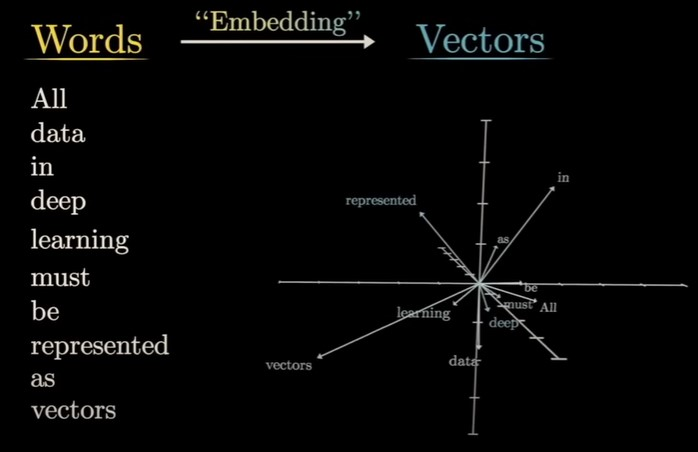

### Import the libraries for using Word2Vec
library gensim: https://github.com/piskvorky/gensim/blob/develop/gensim/models/word2vec.py

In [6]:
!pip install --quiet --upgrade gensim tsfresh "scikit-learn<1.7" matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gensim.downloader as api
from sklearn.decomposition import PCA
from gensim.models import Word2Vec  # this is to train a Word2Vec model



## In this lesson and with the availabe limited computational and time resources, the choice is limited to the following models:
- glove-twitter-25
- Glove-Wikipedia-Gigaword-100
- Word2Vec-Google-News-300 (if there is enough time and bandwidth)

Different Word2Vec models have varying capabilities.
Each Word2Vec model is trained on a specific corpus (data)
and with different parameters, which affects its performance for particular tasks.

With a little experience you can even customize your own Word2Vec model.

### 1° Model (Twitter)

In [2]:

# Load the model (this might take a few minutes the first time)
#model_twitter = api.load('glove-twitter-25')  #Uncomment this line if you want to load this model
# it is a model used to understand twitter language, not very good for physics language


### 2° Model

Given that we want to talk about physics this model is more useful.

In [3]:
# Load the GloVe Wikipedia + Gigaword model
#print("Loading GloVe-Wikipedia-Gigaword-100...")
glove_model = api.load('glove-wiki-gigaword-100')
print("GloVe-Wikipedia-Gigaword-100 loaded successfully!")


[==================================================] 100.0% 128.1/128.1MB downloaded
GloVe-Wikipedia-Gigaword-100 loaded successfully!


### 3° Model, it is bigger infact the file is about 1.5 GB
- Word2Vec-Google-News-300

In [4]:
# Load the second model: Word2Vec-Google-News-300
#UNCOMMENT the load command
#print("Loading the Word2Vec-Google-News-300 model...")
#UNCOMMENT the load command
#google_news_model = api.load('word2vec-google-news-300')
#print("Word2Vec-Google-News-300 model loaded successfully!")
#This model is trained on Google News, providing a more formal and general language understanding.


###  Check the size of the vocabulary of a model

In [ ]:
# Check the size of the vocabulary of the chosen model
#model=model_twitter # for the first model
model=glove_model   # for the second model
#model=google_news_model # for the third model
vocabulary_size = len(model.key_to_index)
print(f"Vocabulary size: {vocabulary_size}")
# Check the vector size (number of dimensions)
vector_size = model.vector_size
print(f"Vector size (number of dimensions): {vector_size}")



The glove wikipedia model has 400000 words and represents each word as a vector with 100 dimensions. The Google-News-300 model has 3000000 and vector size of 300.

## Functions

### We can check the list of all available functions and attributes of the model:

In [5]:

public_methods = [method for method in dir(model) if not method.startswith("_")]
print(public_methods)

NameError: name 'model' is not defined

###  Most useful functions for Word2Vec models:


1. model.most_similar(word, topn=5): Finds the top-N words most similar to the given word.

Example: model.most_similar("physics", topn=5)
2. model.similarity(word1, word2): Computes the similarity score between two words.

Example: model.similarity("physics", "science")
3. model.doesnt_match(list_of_words): Finds the word that doesn't fit with the others.
Example: model.doesnt_match(["physics", "chemistry", "cat"])
5. model.get_vector(word): Retrieves the vector representation of a word.

Example: vector = model.get_vector("physics")
6. model.save(filepath) and model.load(filepath): Save and load models.

Example: model.save("my_model.model") and gensim.models.Word2Vec.load("my_model.model")

### For convenience, the following predefined functions are included in this Jupyter Notebook. They build on the preloaded model, making students  easy to experiment without additional setup.


In [ ]:
def find_similar_words(word, topn=5):
  """
    Finds the top-N most similar words to the given word.

    Parameters:
        word (str): The word to find similar words for.
        topn (int): Number of similar words to return (default is: 5).

    Returns:
        list: A list of tuples (word, similarity score).
  """
  return model.most_similar(word, topn=topn)

def analogy(word1, word2, word3, topn=1):

  """
  Solves an analogy of the form: word1 is to word2 as word3 is to ?.

    Parameters:
        word1 (str): The first word in the analogy (the "base" word to subtract).
        word2 (str): The second word in the analogy (the "target" word to add).
        word3 (str): The third word in the analogy (the "comparison" word to add).
        topn (int): Number of results to return (default: 1).
  """

  return model.most_similar(positive=[word2, word3], negative=[word1], topn=topn)

def visualize_words(words):

    """
    2D visualisation of word embeddings
    This function takes a list of words, retrieves their corresponding word
    embeddings from the loaded Word2Vec model, and reduces the dimensionality
    of the embeddings to 2D using Principal Component Analysis (PCA).
    The resulting 2D vectors are plotted as points in a scatter plot

    """
    word_vectors = [model[word] for word in words]
    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)

    plt.figure(figsize=(10, 8))
    plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

    plt.title("2D Visualization of Word Embeddings", fontsize=20)
    plt.xlabel("Principal Component 1", fontsize=18)
    plt.ylabel("Principal Component 2", fontsize=18)
    plt.grid(True)
    plt.show()



### Similar words
**Important note**: The function applies only to words included originally in the model vocabulary

In [ ]:
# Example 1
find_similar_words("physics")

In [ ]:
# Example 2
concept = "wave"
print(f"Words similar to '{concept}':")
print(find_similar_words(concept))

To calculate the semantic similarity between two words, word2vec apply the cosine similarity concept (see Annex A)


In [ ]:
# Exercise 1
# Try it by yourself
#Try changing the value of concept variable to other physics terms like "force", "mass", etc and print the results.

### Analogies

In [ ]:
# Analogies

word1, word2, word3 = "electron", "proton", "negative"
print(f"\nAnalogy: {word1} : {word2} :: {word3} : ?")
print(analogy(word1, word2, word3))

In [ ]:
print("\nAnalogy: man : woman :: king : ?")
print(analogy('man', 'woman', 'king'))

Something about food preferences


In [ ]:
print("\nAnalogy: japanise : sushi :: italian : ?")
print(analogy('japanese', 'sushi', 'italian'))

We can set `topn=5` to read the other choices

In [ ]:
print("\nAnalogy: japanise : sushi :: italian : ?")
print(analogy('japanese', 'sushi', 'italian',topn=5))

The answers depends on the model loaded.

In [ ]:
print("\nAnalogy: force : acceleration :: voltage : ?")
print(analogy('force', 'acceleration', 'voltage', topn=5))


In [ ]:
print("\nAnalogy: energy : work :: power : ?")
print(analogy('energy', 'work', 'power', topn=5))

In [ ]:
# Exercise 2
#Try creating your own analogies by changing the values of word1, word2, and word3. Use physics concepts you're familiar with.
#Experiment with different combinations and observe the results.


If you try:

In [ ]:
print("\nAnalogy: man : surgeon :: woman : ?")
print(analogy('man', 'doctor', 'woman'))

AS you can see the model reflects the biases present in the corpus (e.g., texts historically dominated by **gender stereotypes**).

In [ ]:
#We ask for the 5 words nearest:

print(analogy('woman', 'nurse', 'man', topn=5))

For other examples see the Table 8 of the paper https://arxiv.org/pdf/1301.3781

### Possibile explanations of mistakes in the analogies:

-Model Quality: If the model was trained on a corpus (dataset) that does not sufficiently emphasize semantic relationships between terms like "king," "queen," "man," and "woman," the results may be different or less accurate.

-Corpus Ambiguity: If the corpus includes multiple meanings for a word (e.g., "king" used metaphorically), the model may capture less specific relationships.

-Static Model Limitations: Models like Word2Vec or GloVe assign a **single vector** to each word, ignoring specific context. This can lead to errors, especially with polysemous words.

## Visualize Word Embedding in two dimensions

The visualization of a vector of size 100 (with the model loaded) in 2D is obtained with PCA (Principal Component Analysis). PCA reduces the high-dimensional 100-dimensional vector space to 2D. PCA may may lose important relationships between words in the reduced dimensions. It’s best suited for visualization, not precise analysis.

In [ ]:
# Visualyze some words in 2d space
visualize_words(['physics', 'energy', 'matter', 'space', 'time'])

### It is possible to retrieve all the components of  a given word vector

In [ ]:
# # Define the word to retrieve the vector for
word = "physics"

# Try to retrieve the vector for the given word
try:
    vector = model[word]  # Retrieve the vector
    print(f"Vector for '{word}':\n{vector} \n It has {len(vector)} components")

except KeyError:
    print(f"The word '{word}' is not in the model vocabulary.")


The first model 'Glove-Twitter' ha vector of 25 components.

As said the reduction of a 100 components vector to 2 components vector has been managed by the PCA techinque.

In [ ]:
# Another example
words_to_visualize = ['force', 'mass', 'acceleration', 'velocity', 'momentum']  # Students can change these words
visualize_words(words_to_visualize)

In [ ]:
#Exercise:
#Add the following word to the previous list. 'cat', 'dog'

In [ ]:
# Try the code:
#Visualize the following words:
#'tea', 'coffee', 'chickpeas'
#model.similarity('tea', 'coffee')
#model.similarity('peas', 'coffee')


## Reflect on these questions
1. Do the spatial relationships between words match your understanding of how these concepts are related in physics?
2. Are there any surprising placements or groupings?
3. How might this kind of visualization be useful (or misleading) in understanding physics concepts?

In [ ]:

def analyze_word_relations(word, model, topn=10):
    """
  It dentifies and prints the top-N words that are most similar to a given word based
  on their vector embeddings in the provided Word2Vec model.
    """
    similar_words = model.most_similar(word, topn=topn)
    print(f"Words most similar to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"  {similar_word}: {similarity:.4f}")

In [ ]:
# Example
analyze_word_relations("physics", model, topn=10)

In [ ]:
# Example Analyze some physics words with a for loop
for word in ['acceleration', 'entropy', 'force', 'energy']:    # for loop
    analyze_word_relations(word, model)
    print()

### Questions after the activities:

1. What interesting relationships did you discover?
2. Were there any surprising or unexpected outcomes?
3. What limitations do you notice in this approach to word representation?

### Finally a well-known example: king - man + woman ≈ queen

We want to keep the same code without introducing new functions.
We construct the vector: king - man + woman and temporarily add it to the vocabulary.
Then we plot it and observe that it is close to the word queen.

In [ ]:
# Words to visualize
words_to_visualize = ['king', 'man', 'woman', 'queen']

# Define and Compute the result vector
result_vector = model['king'] - model['man'] + model['woman']

# Add the result vector to the model
model['Result'] = result_vector

# Visualize 'queen' and the result
visualize_words(['king', 'man', 'woman','queen','monarch', 'Result'])

# Clean up: Remove the temporary vector from the model
del model.key_to_index['Result']

You can see that the word  vector '**Result**' and '**queen**' are near in the 2D space.
You can calculate as exercise the cosine similarity  between 'Result' and 'queen' (see Annex A)



### The exercises of the Part 1 of this notebook end here. Good job! :-)

## Annex A of Part 1. Cosine Similarity

image from Wikipedia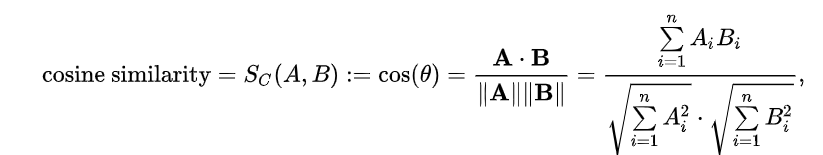

In [ ]:
#Cosine Similarity
# Define the vectors
A = np.array([1, 2, 3])  # components of a 3D vectors
B = np.array([4, 5, 6])# components of a 3D vectors

# Calculate the cosine similarity
# np.dot(A, B) returns the dot product of A and B.
cosine_similarity = np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))
print(f"Cosine Similarity: {cosine_similarity:.4f}")

## Annex B of Part 1:  Explore on your own the following group of words




### Run the following code.

In [ ]:
# We introduce a function  to visualize words groups

def visualize_words(word_groups):
    words = [word for group in word_groups for word in group if word in model.key_to_index]
    word_vectors = [model[word] for word in words]

    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)

    plt.figure(figsize=(16, 12))
    colors = ['r', 'g', 'b', 'c', 'm']

    for i, group in enumerate(word_groups):
        group_words = [word for word in group if word in model.key_to_index]
        group_vectors = [word_vectors_2d[words.index(word)] for word in group_words]
        x, y = zip(*group_vectors) if group_vectors else ([], [])
        plt.scatter(x, y, c=colors[i], label=f'Group {i+1}')

        for word, (x, y) in zip(group_words, group_vectors):
            plt.annotate(word, xy=(x, y), xytext=(10, 5), textcoords='offset points', fontsize=15)

# Add axis labels with variance explained
    plt.xlabel(f"Principal Component 1", fontsize=18)
    plt.ylabel(f"Principal Component 2", fontsize=18)
    plt.xticks(fontsize=15)  # tick labels
    plt.yticks(fontsize=15)
    #plt.title("2D Visualization of Physics Concepts")
    plt.legend()
    plt.grid(True)
    # Add savefig to save the plot in high resolution
    plt.savefig("2dvisualization_smallmodel.png", dpi=300, bbox_inches='tight')
    plt.show()
    plt.show()

In [ ]:
# Example
# Definy the following group of words
mechanics = ['force', 'mass', 'acceleration', 'velocity', 'momentum']
thermodynamics = ['heat', 'temperature', 'energy', 'pressure', 'work']
electromagnetism = ['charge', 'current', 'voltage', 'magnetic', 'electric']
quantum = ['quantum', 'wave', 'particle', 'uncertainty', 'atom', 'photon']

# Visualize the group words
visualize_words([mechanics, thermodynamics, electromagnetism, quantum])

Note that the points of 'force' and 'work' are overlapped.

## Part 2 - How to Train a Word2Vec Network?

In our exercise, we used pre-trained Word2Vec models of various sizes. But how are these models actually trained? Let's summarize the two principal techniques for creating word embeddings:

1. **CBOW (Continuous Bag of Words):**
   - Predicts a target word based on its surrounding context words within a window.
   - It averages the vectors of the context words to predict the central word.
   - Faster to train and works well on large datasets.

2. **Skip-Gram:**
   - Predicts context words based on a given target word.
   - Focuses on capturing semantic relationships, especially for rare words.
   - Slower to train but performs better on small datasets or with rare words.


### The choice between CBOW and Skip-Gram in Word2Vec training depends on several factors.

Dataset Size:

CBOW is generally faster to train on larger datasets.
Skip-Gram often performs better on smaller datasets.

Frequency of Words:

CBOW works better for frequent words.
Skip-Gram is better at handling rare words or phrases.

Other factors are Training Time and Quality.






Figure below: CBOW (left) and Skip-gram (right) models. Source: Mikolov et al. (2013)

CBOW predicts a target word from context, while Skip-gram predicts context words from a target. w(t) is the target word, and w(t±1), w(t±2) are context words.

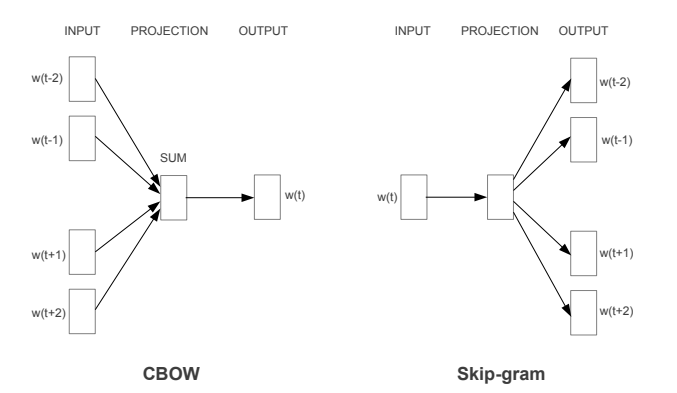

In this section, we explore how to train a Word2Vec network. First, we created a small corpus of sentences related to quantum mechanics from the English Wikipedia page: https://en.m.wikipedia.org/wiki/Introduction_to_quantum_mechanics
and use the following two techniques from scratch using Gensim library (already installed):

*   CBOW (Continuous Bag-of-Words) with parameter `sg=0`
*   Skip-Gram with parameter `sg=1`

Important! Note that we do not need to install or use SpaCy (or any other tokenization NLP library) here because we already provide tokenized sentences. If you wanted to perform text preprocessing (e.g., removing common words (stopwords), special characters, references, etc.), that would be a scenario where SpaCy or similar libraries might be necessary.


In [ ]:
#Sentences created from the wikipedia page: Introduction to Quantum Mechanics
sentences = [
    ['quantum', 'mechanics', 'is', 'the', 'study', 'of', 'atomic', 'and', 'subatomic', 'particles'],
    ['the', 'uncertainty', 'principle', 'is', 'a', 'key', 'concept', 'in', 'quantum', 'mechanics'],
    ['quantum', 'entanglement', 'describes', 'the', 'intertwined', 'properties', 'of', 'particles'],
    ['quantum', 'tunneling', 'allows', 'particles', 'to', 'cross', 'potential', 'barriers'],
    ['quantum', 'interference', 'is', 'illustrated', 'in', 'the', 'double', 'slit', 'experiment'],
    ['the', 'photoelectric', 'effect', 'was', 'explained', 'using', 'quantum', 'concepts'],
    ['planck', 'introduced', 'quantized', 'energy', 'to', 'explain', 'black', 'body', 'radiation'],
    ['quantum', 'field', 'theory', 'describes', 'the', 'interaction', 'of', 'particles', 'and', 'fields'],
    ['the', 'schrodinger', 'equation', 'describes', 'the', 'evolution', 'of', 'quantum', 'states'],
    ['quantum', 'mechanics', 'provides', 'a', 'framework', 'for', 'understanding', 'the', 'microscopic', 'world']
]

Considering the very small corpus (data set) we choice the following setting of the parameters for the training:  Vector Size = 30 and Window = 7: Reduced vector size considering the very small dataset.

min_count = 1: This ensures that even rare words are included, which is useful when dealing with a small corpus corpus.


In [ ]:
# Train CBOW model (sg=0)
print("Training CBOW model...")
# This creates and trains a new Word2Vec model using the CBOW technique. It is possible to set the vector size.
cbow_model = Word2Vec(sentences, vector_size=30, window=7, min_count=1, sg=0, epochs=20)
print("CBOW model trained!")

# Train Skip-Gram model (sg=1)
print("Training Skip-Gram model...")
# This trains a new Word2Vec model using the Skip-Gram technique.
skipgram_model = Word2Vec(sentences, vector_size=30, window=7, min_count=1, sg=1, epochs=20)
print("Skip-Gram model trained!")

# Print the vector embeddings
#print("\nEmbedding for 'quantum' (CBOW):", cbow_model.wv['quantum'])
#print("\nEmbedding for 'quantum' (Skip-Gram):", skipgram_model.wv['quantum'])

# Similarity between words
print("\nWords similar to 'quantum' (CBOW):", cbow_model.wv.most_similar('quantum'))
print("\nWords similar to 'quantum' (Skip-Gram):", skipgram_model.wv.most_similar('quantum'))



Since our custom quantum mechanics corpus of sentences is very small, the results from method most_similar() is not  especially meaningful. Results with the two techiques/architectures are very similar. However, the exercise is effective in demostrating the process of building a Word2Vec model and comparing the two architectures.

### Training Word2vec with a bigger dataset (text8)

Next, we load the pre-prepared corpus called `text8` to illustrate how a larger and more diversified dataset can significantly improve the quality and interpretability of the embeddings. This corpus is an extract of English Wikipedia, cleaned of punctuation and already tokenized into words. Its size and structure make it optimal for demonstrating the advantages and characteristics of CBOW and Skip-Gram.



In [ ]:
# Load corpus text8
print("Loading text8 corpus...")
text8_corpus = api.load('text8')
sentences = list(text8_corpus)
print(f"Number of sentences in text8: {len(sentences)}")



In [ ]:
#sentences = list(text8_corpus)
sentences = list(text8_corpus)
print(f"Number of sentences in: {len(sentences)}")
print("Example sentence:", sentences[100])

### Training phase
Consider that can take some minutes

In [ ]:
# min_count=2 instead of 5 to consider more words
# Train the CBOW model
print("Training CBOW model on text8...")
cbow_model_text8 = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=0, epochs=5)  #
print("CBOW model trained!")

# Train the Skip-Gram model
print("Training Skip-Gram model on text8...")
skipgram_model_text8 = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=1, epochs=5)
print("Skip-Gram model trained!")

In [ ]:
#Comparison: Words similar to ‘physics'
print("\nWords similar to 'Physics' (CBOW):", cbow_model_text8.wv.most_similar('physics',topn=5))
print("\nWords similar to 'Physics' (Skip-Gram):", skipgram_model_text8.wv.most_similar('physics',topn=5))

As you can see, both techniques capture words that are similar in meaning to the assigned word **'physics'**.

Searching for similar words to a rare word like **'pulsar'** we can illustrate the differences between the CBOW and Skip-Gram techiques.

In [ ]:
print("\nWords similar to 'pulsar' (CBOW):", cbow_model_text8.wv.most_similar('pulsar',topn=5))
print("\nWords similar to 'pulsar' (Skip-Gram):", skipgram_model_text8.wv.most_similar('pulsar',topn=5))

We can see that  with Skip-Gram we can capture more significant relations for rare words like 'pulsar'.

### Congratulations! You have completed the Jupyter Notebook.
